### This file plots the processed csv files with matplotlib

In [148]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [149]:
date = '2018-11-03_10h45'
worker_list = [8,16,32,64]
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/' + date + '/'

## Throughput plot for read loads

In [150]:
# read data into pandas dataframe
df_tp = pd.read_csv(base_path + 'two_mws_tp.csv')
df_tp

,client,worker,write_tp_mean,write_tp_std,read_tp_mean,read_tp_std
0,12,8,6214.388889,38.558701,2951.072222,1.751419
1,12,16,6174.350000,44.656261,2951.661111,1.684479
2,12,32,6146.866667,72.971168,2948.277778,0.569979
3,12,64,6088.977778,49.616161,2953.866667,5.306512
4,24,8,8486.350000,17.672158,2950.844444,7.021255
5,24,16,8718.250000,37.290618,2958.561111,1.478070
6,24,32,8610.877778,24.002783,2960.594444,17.581921
7,24,64,8522.377778,65.071690,2958.194444,4.093023
8,48,8,9482.772222,64.100145,2951.633333,3.246736
9,48,16,10510.294444,59.266327,2954.416667,1.115298


In [151]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

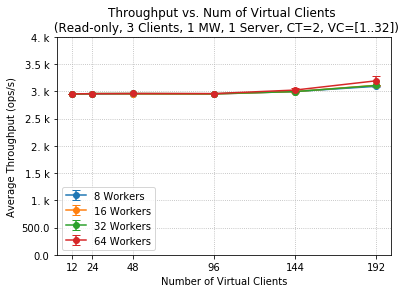

In [166]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..32])")

for worker in worker_list:
    # extract values of interest
    df_tp_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_cut['client']
    tps = df_tp_cut['read_tp_mean']
    std = df_tp_cut['read_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0,top=1e3+np.mean(df_tp['read_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_tp_read.png", dpi = 150)


## Throughput plot for write loads

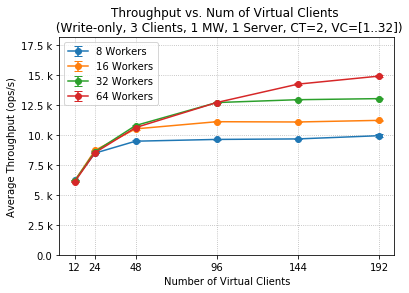

In [167]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..32])")

for worker in worker_list:
    # extract values of interest
    df_tp_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_cut['client']
    tps = df_tp_cut['write_tp_mean']
    std = df_tp_cut['write_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0,top=8e3+np.mean(df_tp['write_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_tp_write.png", dpi = 150)


## Response-time plot for read loads

In [168]:
# read data into pandas dataframe
df_rt = pd.read_csv(base_path + 'two_mws_rt.csv')
df_rt

,client,worker,write_rt_mean,write_rt_std,read_rt_mean,read_rt_std
0,12,8,1.139030,0.008454,3.218920,0.023579
1,12,16,1.158776,0.014532,3.228135,0.007652
2,12,32,1.165529,0.011646,3.242345,0.006285
3,12,64,1.169147,0.010783,3.223598,0.009095
4,24,8,1.992319,0.012452,7.278089,0.008649
5,24,16,1.942380,0.019193,7.249698,0.012497
6,24,32,1.992489,0.010366,5.455919,2.497859
7,24,64,2.014885,0.008349,7.235175,0.010779
8,48,8,4.194415,0.015846,15.333781,0.008625
9,48,16,3.660643,0.004114,15.253290,0.007149


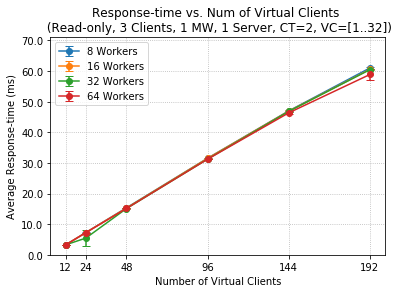

In [169]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..32])")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['read_rt_mean']
    std = df_rt_cut['read_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['read_rt_mean'])+10)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_rt_read.png", dpi = 150)


## Response-time plot for write loads

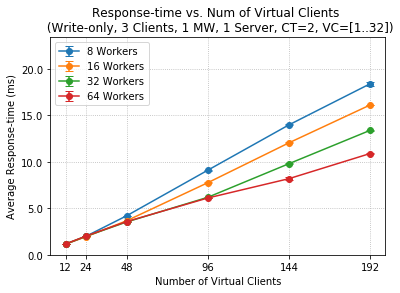

In [170]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..32])")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['write_rt_mean']
    std = df_rt_cut['write_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['write_rt_mean'])+5)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_rt_write.png", dpi = 150)


## Queue length plot for read loads

In [171]:
# read data into pandas dataframe
df_ql = pd.read_csv(base_path + 'two_mws_queuelength.csv')
df_ql

,client,worker,read_queueLength,read_queueLength_std,write_queueLength,write_queueLength_std
0,12,8,1.769063,0.036001,1.575524,0.040110
1,12,16,1.770291,0.017642,1.520295,0.027791
2,12,32,1.804791,0.078067,1.501060,0.007487
3,12,64,1.777136,0.027933,1.460056,0.028526
4,24,8,2.298772,0.005780,2.027308,0.003389
5,24,16,2.874394,0.016899,2.102174,0.012048
6,24,32,2.501610,0.490787,2.063011,0.013602
7,24,64,2.854806,0.020986,1.990637,0.022279
8,48,8,11.686463,0.056170,10.792432,0.053021
9,48,16,4.322089,0.023358,3.541225,0.023734


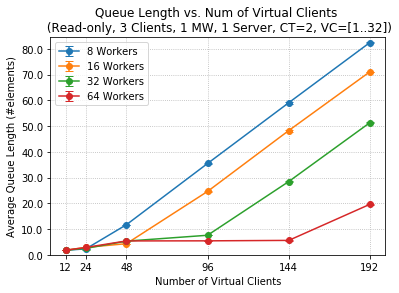

In [172]:
f = plt.figure()
plt.title("Queue Length vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..32])")

for worker in worker_list:
    # extract values of interest
    df_ql_cut = df_ql[(df_ql.worker == worker)]
    
    vcs = df_ql_cut['client']
    tps = df_ql_cut['read_queueLength']
    std = df_ql_cut[' read_queueLength_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Queue Length (#elements)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_ql['read_queueLength'])+2)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_queuelength_read.png", dpi = 150)


## Queue length plot for write loads

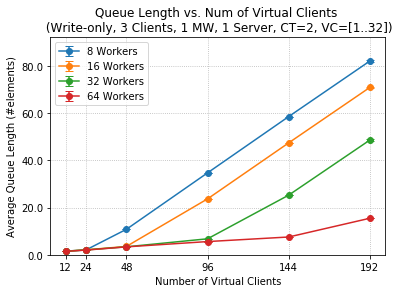

In [173]:
f = plt.figure()
plt.title("Queue Length vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..32])")

for worker in worker_list:
    # extract values of interest
    df_ql_cut = df_ql[(df_ql.worker == worker)]
    
    vcs = df_ql_cut['client']
    tps = df_ql_cut['write_queueLength']
    std = df_ql_cut['write_queueLength_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Queue Length (#elements)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_ql['write_queueLength'])+10)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_queuelength_write.png", dpi = 150)


## Response-time breakdown histogram for read loads

In [174]:
# read data into pandas dataframe
df_b = pd.read_csv(base_path + 'two_mws_rt_breakdown.csv')
df_b

,client,worker,read_netthreadTime,read_queueTime,read_workerPreTime,read_memcachedRTT,read_workerPostTime,write_netthreadTime,write_queueTime,write_workerPreTime,write_memcachedRTT,write_workerPostTime
0,12,8,0.013408,0.116356,0.011977,3.061943,0.015236,0.022834,0.102414,0.011957,0.971160,0.030665
1,12,16,0.013580,0.113519,0.012716,3.072996,0.015323,0.023953,0.102692,0.012048,0.989139,0.030943
2,12,32,0.013873,0.121797,0.013041,3.078305,0.015328,0.024186,0.100162,0.012528,0.996645,0.032008
3,12,64,0.013629,0.120111,0.013952,3.060062,0.015845,0.024686,0.100224,0.012997,0.998816,0.032425
4,24,8,0.013844,2.166069,0.012947,5.069857,0.015373,0.025185,0.423283,0.013314,1.493312,0.037224
5,24,16,0.013998,0.170891,0.013719,7.035414,0.015676,0.025093,0.135348,0.014420,1.729902,0.037617
6,24,32,0.013356,0.146794,0.013203,5.266699,0.015867,0.024838,0.132141,0.014369,1.783627,0.037515
7,24,64,0.014112,0.177655,0.014826,7.011867,0.016714,0.026624,0.131118,0.015828,1.801198,0.040117
8,48,8,0.012955,9.923702,0.016877,5.364270,0.015977,0.025109,2.505978,0.013694,1.606741,0.042893
9,48,16,0.015283,4.774178,0.020107,10.427417,0.016304,0.027710,0.912177,0.019978,2.648640,0.052139


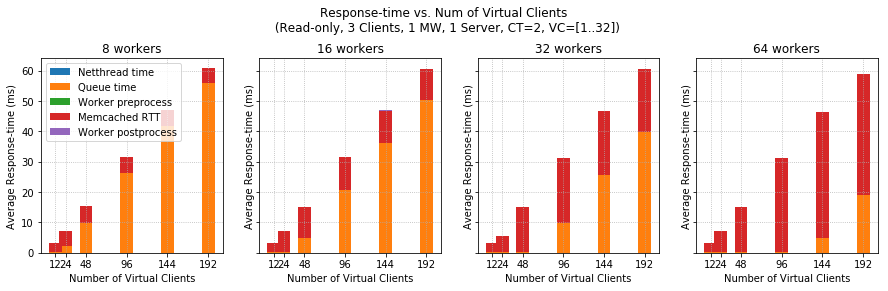

In [175]:
f, ax = plt.subplots(1, len(worker_list), sharex='col', sharey='row')
f.suptitle("Response-time vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..32])")
f.subplots_adjust(top=0.8)
f.set_figwidth(15)
i=0

for worker in worker_list:
    # extract values of interest
    df_b_cut = df_b[(df_b.worker == worker)]
    
    vcs = df_b_cut['client']
    net_time = df_b_cut['read_netthreadTime']
    queue_time = df_b_cut['read_queueTime']
    workerPreTime = df_b_cut['read_workerPreTime']
    memcachedRTT = df_b_cut['read_memcachedRTT']
    workerPostTime = df_b_cut['read_workerPostTime']

    width = 15       # the width of the bars: can also be len(x) sequence
    ax[i].bar(vcs, net_time, width, label='Netthread time')
    ax[i].bar(vcs, queue_time, width, bottom=net_time, label='Queue time')
    ax[i].bar(vcs, workerPreTime, width, bottom=net_time+queue_time, label='Worker preprocess')
    ax[i].bar(vcs, memcachedRTT, width, bottom=net_time+queue_time+workerPreTime, label='Memcached RTT')
    ax[i].bar(vcs, workerPostTime, width, bottom=net_time+queue_time+workerPreTime+memcachedRTT, label='Worker postprocess')

    ax[i].grid(linestyle = "dotted")
    ax[i].set_ylabel("Average Response-time (ms)")
    ax[i].set_xlabel("Number of Virtual Clients")
    ax[i].set_xticks([0] + np.array(vcs))
    ax[i].set_ylim(bottom=0)
    ax[i].set_title('{} workers'.format(worker))
    if i==0:
        ax[i].legend()
    
    i += 1

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_rt_breakdown_read.png", dpi = 150)


## Response-time breakdown histogram for write loads

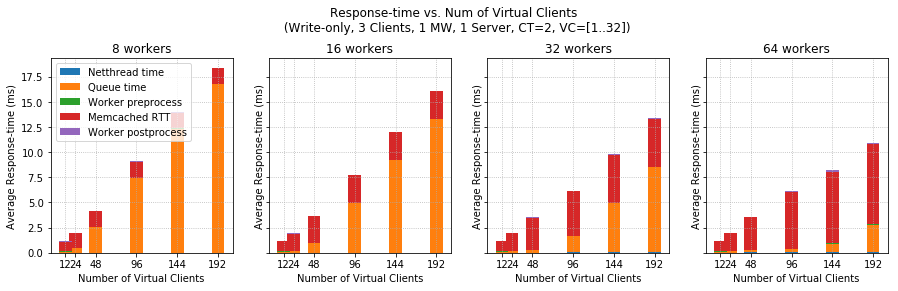

In [176]:
#f = plt.figure()
f, ax = plt.subplots(1, len(worker_list), sharex='col', sharey='row')
f.suptitle("Response-time vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..32])")
f.subplots_adjust(top=0.8)
f.set_figwidth(15)


i=0
for worker in worker_list:
    # extract values of interest
    df_b_cut = df_b[(df_b.worker == worker)]
    
    vcs = df_b_cut['client']
    net_time = df_b_cut['write_netthreadTime']
    queue_time = df_b_cut['write_queueTime']
    workerPreTime = df_b_cut['write_workerPreTime']
    memcachedRTT = df_b_cut['write_memcachedRTT']
    workerPostTime = df_b_cut['write_workerPostTime']

    width = 15       # the width of the bars: can also be len(x) sequence
    ax[i].bar(vcs, net_time, width, label='Netthread time')
    ax[i].bar(vcs, queue_time, width, bottom=net_time, label='Queue time')
    ax[i].bar(vcs, workerPreTime, width, bottom=net_time+queue_time, label='Worker preprocess')
    ax[i].bar(vcs, memcachedRTT, width, bottom=net_time+queue_time+workerPreTime, label='Memcached RTT')
    ax[i].bar(vcs, workerPostTime, width, bottom=net_time+queue_time+workerPreTime+memcachedRTT, label='Worker postprocess')

    ax[i].grid(linestyle = "dotted")
    ax[i].set_ylabel("Average Response-time (ms)")
    ax[i].set_xlabel("Number of Virtual Clients")
    ax[i].set_xticks([0] + np.array(vcs))
    ax[i].set_ylim(bottom=0)
    ax[i].set_title('{} workers'.format(worker))
    if i==0:
        ax[i].legend()
    
    i += 1

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_rt_breakdown_write.png", dpi = 150)
